In [166]:
import pandas as pd
import numpy as np
import ast

In [167]:
df = pd.read_csv('/home/amir/projects/light-sa-type-inf/ManyTypes4Py_processed_fix_feb2/all_fns.csv',
                 low_memory=False)
# dtype={'author': str, 'repo': str, 'file': str, 'set': str,
#                                           'name': str, 'has_type': bool, 'docstring': str,
#                                           'func_descr': str, 'arg_names': object, 'arg_types': object,
#                                           'arg_descrs': object, 'return_type': str, 'return_expr': object,
#                                           'args_occur': object, 'return_descr': str, 'variables': object,
#                                           'variables_types': object, 'aval_types': object, 'arg_names_len': int,
#                                           'arg_types_len': int}

In [168]:
df.head()

,author,repo,file,set,cls_name,fn_name,has_type,docstring,fn_descr,arg_names,...,return_descr,cls_variables,cls_variables_types,fn_variables,fn_variables_types,mod_variables,mod_variables_types,aval_types,arg_names_len,arg_types_len
0,hmschreck,idea_plugins,repos/hmschreck/idea_plugins/python/helpers/co...,train,NaN,usage,False,NaN,NaN,[],...,NaN,NaN,NaN,[],[],"['error wrong usage', 'error exception']","['', '']","['sys', 'traceback', 'common', 'get index', 'c...",0,0
1,hmschreck,idea_plugins,repos/hmschreck/idea_plugins/python/helpers/co...,train,NaN,do list available package,False,NaN,NaN,[],...,NaN,NaN,NaN,['index'],[''],"['error wrong usage', 'error exception']","['', '']","['sys', 'traceback', 'common', 'get index', 'c...",0,0
2,hmschreck,idea_plugins,repos/hmschreck/idea_plugins/python/helpers/co...,train,NaN,do list channel,False,NaN,NaN,[],...,NaN,NaN,NaN,['channel'],[''],"['error wrong usage', 'error exception']","['', '']","['sys', 'traceback', 'common', 'get index', 'c...",0,0
3,hmschreck,idea_plugins,repos/hmschreck/idea_plugins/python/helpers/co...,train,NaN,main,False,NaN,NaN,[],...,NaN,NaN,NaN,"['retcode', 'cmd']","['', '']","['error wrong usage', 'error exception']","['', '']","['sys', 'traceback', 'common', 'get index', 'c...",0,0
4,hmschreck,idea_plugins,repos/hmschreck/idea_plugins/python/helpers/te...,train,TestRestoreFuncByDocComment,set up,False,NaN,NaN,['self'],...,NaN,[],[],['m'],[''],"['m', 'be cli', 'version']","['', '', '']","['unittest', 'sys', 'sys', 'builtins', 'builtin']",1,0


In [169]:
print("Number of projects: ", len(set(df.apply(lambda x: x['author'] + "/" + x['repo'], axis=1))))

Number of projects:  5092


In [170]:
print(f"Number of source code files: {len(df['file'].unique()):,}")

Number of source code files: 184,186


In [181]:
184186 - 183916

270

In [171]:
print(f"Number of files with type annotations: {len(df[df['has_type'] == True].drop_duplicates('file', keep='last')):,}")

Number of files with type annotations: 51,057


In [172]:
print(f"Number of functions: {len(df.fn_name):,}")

Number of functions: 2,100,870


In [173]:
print(f"Number of classes: {df.cls_name.count():,}")

Number of classes: 1,441,730


In [174]:
print(f"Number of functions with a type: {len(df[df['has_type'] == True]):,}")

Number of functions with a type: 379,173


In [175]:
print(f"Number of arguemts: {sum(df['arg_names'].apply(lambda x: len(ast.literal_eval(x)))):,}")

Number of arguemts: 3,931,367


In [176]:
print(f"Number of arguemts with types: {sum(df['arg_types'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != '']))):,}")

Number of arguemts with types: 485,904


In [33]:
print(f"Number of functions with a return type: {df['return_type'].count():,}")

Number of functions with a return type: 325,532


In [34]:
print(f"Number of functions with docstring: {df['docstring'].count():,}")

Number of functions with docstring: 235,683


In [36]:
print(f"Number of functions with description: {df['func_descr'].count():,}")

Number of functions with description: 672,914


In [38]:
print(f"Number of arguemts with comments: {sum(df['arg_descrs'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != '']))):,}")

Number of arguemts with comments: 220,976


In [79]:
print(f"Number of functions with a comment: {df['docstring'].count() + df['fn_descr'].count() + sum(df['arg_descrs'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != '']))) + df['return_descr'].count():,}")

Number of functions with a comment: 1,129,573


In [39]:
print(f"Number functions with a return type comment: {df['return_descr'].count():,}")

Number functions with a return type comment: 62,564


In [178]:
args_t = list(df['arg_types'].apply(lambda x: [t for t in ast.literal_eval(x) if t != '']))
ret_t = list(df[df['return_type'].notnull()]['return_type'].values)
fn_vars_t = list(df['fn_variables_types'].apply(lambda x: [t for t in ast.literal_eval(x) if t != '']))
cls_vars_t = [t for cls_t in df.drop_duplicates('cls_name', keep='last')[df['cls_variables_types'].notnull()]['cls_variables_types'] for t in ast.literal_eval(cls_t) if t != '']
mod_vars_t = list(df.drop_duplicates('file', keep='last')['mod_variables_types'].apply(lambda x: [t for t in ast.literal_eval(x) if t != '']))

/home/amir/py_venv/py_36_new/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [179]:
print(f"Total Number of type annotations: {sum([len(t)for t in args_t]) + len(ret_t) + sum([len(t) for t in fn_vars_t]) + len(cls_vars_t) + sum([len(t) for t in mod_vars_t]):,}")

Total Number of type annotations: 880,587


In [180]:
print(f"Number of unique types: {len(set([t for l in args_t for t in l] + ret_t + [t for l in fn_vars_t for t in l] + cls_vars_t + [t for l in mod_vars_t for t in l])):,}")

Number of unique types: 67,946


In [154]:
def set_stats(d, s):
    print(f"Number of projects: ", len(set(d[d['set'] == s].apply(lambda x: x['author'] + "/" + x['repo'], axis=1))))
    print(f"Number of source code files: {len(d[d['set'] == s]['file'].unique()):,}")
    print(f"Number of files with type annotations: {len(d[d['set'] == s][d['has_type'] == True].drop_duplicates('file', keep='last')):,}")
    print(f"Number of functions: {len(d[d['set'] == s].fn_name):,}")
    print(f"Number of functions with a type: {len(d[d['set'] == s][d['has_type'] == True]):,}")
    print(f"Number of functions with a return type: {d[d['set'] == s]['return_type'].count():,}")
    print(f"Number of functions with docstring: {d[d['set'] == s]['docstring'].count():,}")
    print(f"Number of functions with description: {d[d['set'] == s]['fn_descr'].count():,}")
    print(f"Number functions with a return type comment: {d[d['set'] == s]['return_descr'].count():,}")
    print(f"Number of functions with a comment: {d[d['set'] == s]['docstring'].count() + d[d['set'] == s]['fn_descr'].count() + sum(d[d['set'] == s]['arg_descrs'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != '']))) + d[d['set'] == s]['return_descr'].count():,}")
    print(f"Number of arguemts: {sum(d[d['set'] == s]['arg_names'].apply(lambda x: len(ast.literal_eval(x)))):,}")
    print(f"Number of arguemts with types: {sum(d[d['set'] == s]['arg_types'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != '']))):,}")
    print(f"Number of arguemts with comments: {sum(d[d['set'] == s]['arg_descrs'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != '']))):,}")

In [161]:
set_stats(df, 'test')

Number of projects:  3796
Number of source code files: 36,832


/home/amir/py_venv/py_36_new/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Number of files with type annotations: 10,191
Number of functions: 418,230


/home/amir/py_venv/py_36_new/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Number of functions with a type: 73,874
Number of functions with a return type: 65,109
Number of functions with docstring: 46,699
Number of functions with description: 134,318
Number functions with a return type comment: 13,030
Number of functions with a comment: 225,616
Number of arguemts: 790,283
Number of arguemts with types: 95,747
Number of arguemts with comments: 44,599


In [162]:
set_stats(df, 'train')

Number of projects:  4913
Number of source code files: 132,409


/home/amir/py_venv/py_36_new/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Number of files with type annotations: 36,542
Number of functions: 1,509,048


/home/amir/py_venv/py_36_new/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Number of functions with a type: 271,525
Number of functions with a return type: 234,319
Number of functions with docstring: 169,672
Number of functions with description: 483,507
Number functions with a return type comment: 44,696
Number of functions with a comment: 812,632
Number of arguemts: 2,822,699
Number of arguemts with types: 347,898
Number of arguemts with comments: 159,453


In [159]:
def find_all_types_set(d, s):
    args_t = list(d[d['set'] == s]['arg_types'].apply(lambda x: [t for t in ast.literal_eval(x) if t != '']))
    ret_t = list(d[d['set'] == s][d['return_type'].notnull()]['return_type'].values)
    fn_vars_t = list(d[d['set'] == s]['fn_variables_types'].apply(lambda x: [t for t in ast.literal_eval(x) if t != '']))
    cls_vars_t = [t for cls_t in d.drop_duplicates('cls_name', keep='last')[d['cls_variables_types'].notnull()]['cls_variables_types'] for t in ast.literal_eval(cls_t) if t != '']
    mod_vars_t = list(d.drop_duplicates('file', keep='last')['mod_variables_types'].apply(lambda x: [t for t in ast.literal_eval(x) if t != '']))
    print(f"Total Number of type annotations: {sum([len(t)for t in args_t]) + len(ret_t) + sum([len(t) for t in fn_vars_t]) + len(cls_vars_t) + sum([len(t) for t in mod_vars_t]):,}")
    print(f"Number of unique types: {len(set([t for l in args_t for t in l] + ret_t + [t for l in fn_vars_t for t in l] + cls_vars_t + [t for l in mod_vars_t for t in l])):,}")

In [164]:
find_all_types_set(df, 'train')

/home/amir/py_venv/py_36_new/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/amir/py_venv/py_36_new/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Total Number of type annotations: 634,851
Number of unique types: 53,614


Sum of Top 10 frequent types: 439747


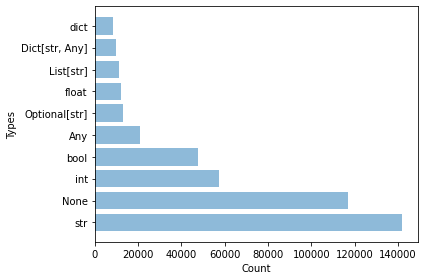

In [115]:
from collections import Counter
import matplotlib.pyplot as plt

all_types = [l for t in args_t for l in t] + ret_t + \
             [l for t in fn_vars_t for l in t] + cls_vars_t + [l for t in mod_vars_t for l in t]
top_n=10

# Already sorted
df_plot = pd.DataFrame.from_records(Counter(all_types).most_common(top_n), columns=['type', 'count'])

print(f"Sum of Top {top_n} frequent types: {sum(counts)}")

types = df_plot['type'].values[:top_n]
counts = df_plot['count'].values[:top_n]
y_pos = np.arange(len(counts))

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, types)
plt.xlabel('Count')
plt.ylabel('Types')
#plt.title('Top %d most frequent types in the dataset' % top_n)
plt.tight_layout() # Fixes the Y axis lables to be shown completely.

# plt.savefig('top-%d-most-frequent-types.pdf' % top_n, format='pdf', bbox_inches='tight',
#             dpi=256)
plt.show()

In [97]:
all_types

['str',
 'Tuple[int, int]',
 'List[List[str]]',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'int',
 'int',
 'str',
 'str',
 'int',
 'int',
 'Iterator[str]',
 'Dict[Tuple[int, int], int]',
 'Tuple[int, int]',
 'int',
 'Iterator[str]',
 'str',
 'str',
 'List[int]',
 'List[int]',
 'int',
 'List[int]',
 'str',
 'str',
 'List[List[str]]',
 'List[List[str]]',
 'List[List[str]]',
 'str',
 'str',
 'int',
 'str',
 'str',
 'List[Unit]',
 'List[Unit]',
 'str',
 'str',
 "'Unit'",
 "'Unit'",
 'str',
 'Iterator[Claim]',
 'Iterator[Claim]',
 'Iterator[Claim]',
 'str',
 'str',
 'int',
 'int',
 'str',
 'int',
 'int',
 'int',
 'int',
 'object',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'int',
 'int',
 "'Vector'",
 "'Vector'",
 'object',
 "'Vector'",
 'int',
 'str',
 'int',
 'int',
 'int',
 "'Actor'",
 'Vector',
 'str',
 'Actor